In [235]:
import os.path
import cv2
import json
import numpy as np
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

import albumentations as A 
from sahi.utils.file import load_json, save_json
from tqdm import tqdm

In [ ]:
coco_file_name  = "cassette_val"

# Determine target split from coco_file_name
target_split = None
if "train" in coco_file_name.lower():
    target_split = "train"
elif "test" in coco_file_name.lower():
    target_split = "test"
elif "val" in coco_file_name.lower():
    target_split = "val"
if not target_split:
    raise ValueError("Unable to determine target split from coco_file_name.")

print(target_split)

DATA_DIR = os.path.join("..", "testy")
COCO_DIR = os.path.join(DATA_DIR, "coco")

ORG_ANNOTATION_PATH = os.path.join(DATA_DIR, "coco",target_split, f"{coco_file_name}_corrected_coco.json")
SLC_ANNOTATION_PATH = os.path.join(DATA_DIR, "coco",target_split, f"{coco_file_name}_sliced_coco.json")

AUGMENTATION_PATH = os.path.join(COCO_DIR, "augmentated") # Folder for all augmentations ./data/coco/augmentated

print(ORG_ANNOTATION_PATH)

#IMAGE_DIR = os.path.join(COCO_DIR, "images")
IMAGE_DIR = os.path.join(COCO_DIR, "images")
SLICED_IMAGE_DIR = os.path.join(COCO_DIR, "images_sliced",coco_file_name)

BBOX_VISUALIZATION_DIR = os.path.join(DATA_DIR, "bbox_vis", coco_file_name)
BBOX_SAVE_DIR = os.path.join(BBOX_VISUALIZATION_DIR,"each") #Place to savea each of the before augmented bounding boxes

os.path.exists(DATA_DIR)
os.path.exists(COCO_DIR)

os.path.exists(ORG_ANNOTATION_PATH)
os.path.exists(IMAGE_DIR)
os.path.exists(BBOX_VISUALIZATION_DIR)

os.makedirs(BBOX_SAVE_DIR, exist_ok=True)
os.makedirs(AUGMENTATION_PATH,exist_ok=True)

val
..\testy\coco\val\cassette_val_corrected_coco.json


In [175]:
coco_dict = load_json(ORG_ANNOTATION_PATH)
[img.update({"file_name": img["file_name"].split("/")[-1]}) for img in coco_dict["images"]]
save_json(coco_dict, save_path=ORG_ANNOTATION_PATH)

coco_dict

{'images': [{'width': 4096,
   'height': 2000,
   'id': 4,
   'file_name': '01BN02.bmp'}],
 'annotations': [{'id': 98,
   'image_id': 4,
   'category_id': 5,
   'segmentation': [],
   'bbox': [2214.833880112831,
    223.5076988929449,
    21.737717054118985,
    45.54569287529642],
   'ignore': 0,
   'iscrowd': 0,
   'area': 990.0593847569965},
  {'id': 99,
   'image_id': 4,
   'category_id': 5,
   'segmentation': [],
   'bbox': [2729.2931837269757,
    203.84024060588504,
    28.983622738824923,
    38.29978719059021],
   'ignore': 0,
   'iscrowd': 0,
   'area': 1110.066582909346},
  {'id': 100,
   'image_id': 4,
   'category_id': 5,
   'segmentation': [],
   'bbox': [1882.5573479998739,
    603.4001826482585,
    12.421552602353332,
    22.772846437648226],
   'ignore': 0,
   'iscrowd': 0,
   'area': 282.87410993056216},
  {'id': 101,
   'image_id': 4,
   'category_id': 7,
   'segmentation': [],
   'bbox': [2414.76780379523,
    623.8160249415288,
    6.427339063585387,
    8.7645532

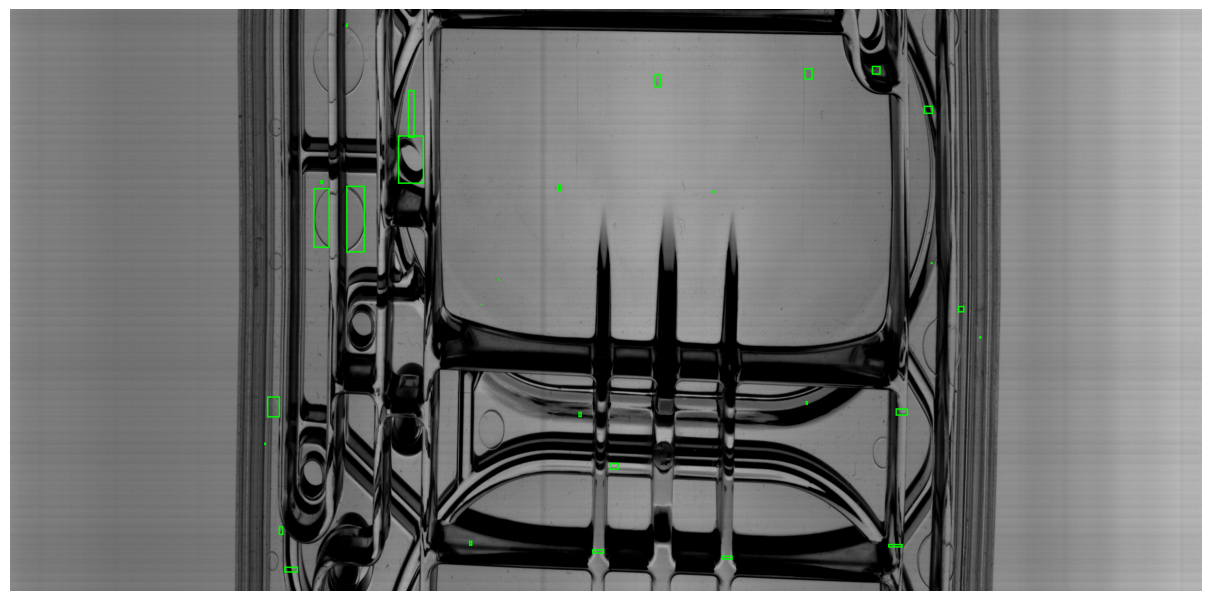

In [ ]:
for img in coco_dict["images"]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), constrained_layout=True)

    mono_img = Image.open(os.path.join(IMAGE_DIR,img["file_name"])).convert("L")
    rgb_img = Image.merge("RGB", (mono_img, mono_img, mono_img))

    
    # iterate over all annotations
    for ann_ind in range(len(coco_dict["annotations"])):
        
        if coco_dict["annotations"][ann_ind]["image_id"] == img["id"]:
            # convert coco bbox to pil bbox
            xywh = coco_dict["annotations"][ann_ind]["bbox"]
            xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]

            # visualize bbox over image
            ImageDraw.Draw(rgb_img).rectangle(xyxy, width=5, outline="lime")

    ax.axis("off")
    ax.imshow(rgb_img)
    fig.savefig(os.path.join(BBOX_SAVE_DIR, img["file_name"][:-4] + ".png")) #save each of the image original

In [227]:
slc_dict= load_json(SLC_ANNOTATION_PATH)
print(SLC_ANNOTATION_PATH)

slc_dict


..\testy\coco\val\cassette_val_sliced_coco.json


{'images': [{'height': 640,
   'width': 640,
   'id': 27,
   'file_name': '01BN02_0_1024_1360_1664_2000.png'}],
 'annotations': [{'iscrowd': 0,
   'image_id': 27,
   'bbox': [553.0431440518012,
    467.751590298049,
    11.85288946908031,
    16.681844437964855],
   'segmentation': [[553, 467, 553, 484, 564, 484, 564, 467]],
   'category_id': 6,
   'id': 45,
   'area': 197}],
 'categories': [{'id': 0, 'name': 'blocked_valve'},
  {'id': 1, 'name': 'bubble'},
  {'id': 2, 'name': 'chip_crack'},
  {'id': 3, 'name': 'excessive_flash'},
  {'id': 4, 'name': 'improper_welding'},
  {'id': 5, 'name': 'light_stain'},
  {'id': 6, 'name': 'line_crack'},
  {'id': 7, 'name': 'particle_material'},
  {'id': 8, 'name': 'residue_stain'},
  {'id': 9, 'name': 'unknown'},
  {'id': 10, 'name': 'welding_blob'}]}

In [178]:
for img in slc_dict["images"]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), constrained_layout=True)
    
    # Open the sliced image file in grayscale, convert it to RGB
    sliced_img_path = os.path.join(SLICED_IMAGE_DIR, img["file_name"])
    mono_img = Image.open(sliced_img_path).convert("L")
    rgb_img = Image.merge("RGB", (mono_img, mono_img, mono_img))
    
    # Iterate over all annotations for this specific image
    for annotation in slc_dict["annotations"]:
        if annotation["image_id"] == img["id"]:
            # Extract and convert bounding box coordinates
            xywh = annotation["bbox"]
            xyxy = [xywh[0], xywh[1], xywh[0] + xywh[2], xywh[1] + xywh[3]]
            
            # Draw the bounding box on the image
            ImageDraw.Draw(rgb_img).rectangle(xyxy, width=5, outline="lime")
    
    # Display and save the image with bounding boxes
    ax.axis("off")
    ax.imshow(rgb_img)
    fig.savefig(os.path.join(BBOX_SAVE_DIR, img["file_name"][:-4] + ".png")) #save each of the image to folder called Each
    plt.close()

In [196]:
splits = ["train", "test", "val"]

# Create 'original' and 'sliced' directories within each split
for split in splits:
    base_path = os.path.join(AUGMENTATION_PATH, split)
    os.makedirs(base_path, exist_ok=True)
    
    # Create 'original' and 'sliced' subdirectories within each split
    os.makedirs(os.path.join(base_path, "original"), exist_ok=True)
    os.makedirs(os.path.join(base_path, "sliced"), exist_ok=True)

## Spatial AUGMENTATION

### horizontal flip

In [ ]:
'''
from tqdm import tqdm

def horizontal_flip_with_bboxes(
    image_dir,
    coco_annotations,
    output_dir,
    aug_type="horizontal_flip",
    dataset_type="original",
    mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225),
    max_pixel_value=255.0
):
    # Set AUG_SAVE_DIR and AUG_VIEW_DIR based on dataset_type (either "original" or "sliced")
    AUG_SAVE_DIR = os.path.join(AUGMENTATION_PATH, target_split, dataset_type, aug_type, "each")
    AUG_VIEW_DIR = os.path.join(AUGMENTATION_PATH, target_split, dataset_type, aug_type)

    os.makedirs(AUG_SAVE_DIR, exist_ok=True)
    os.makedirs(AUG_VIEW_DIR, exist_ok=True)
    
    # Augmentation pipeline with customizable normalization
    augmentation_pipeline = A.Compose([
        A.HorizontalFlip(p=1.0),
        A.Normalize(mean=mean, std=std, max_pixel_value=max_pixel_value)
    ], bbox_params=A.BboxParams(format="coco", label_fields=["class_labels"]))

    # Use tqdm to show progress
    for img in tqdm(coco_annotations["images"], desc=f"Processing {dataset_type} images"):
        file_name = img["file_name"]
        image_id = img["id"]

        # Load image and associated bounding boxes and labels
        image_path = os.path.join(image_dir, file_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for albumentations
        
        # Get bounding boxes and labels
        bboxes = [ann["bbox"] for ann in coco_annotations["annotations"] if ann["image_id"] == image_id]
        class_labels = [ann["category_id"] for ann in coco_annotations["annotations"] if ann["image_id"] == image_id]

        # Apply augmentation with normalization
        augmented = augmentation_pipeline(image=image, bboxes=bboxes, class_labels=class_labels)
        augmented_image = augmented["image"]
        augmented_bboxes = augmented["bboxes"]

        # Re-scale normalized image back to [0, 255] for saving in RGB
        augmented_image_rescaled = (augmented_image * np.array(std) + np.array(mean)) * max_pixel_value
        augmented_image_rescaled = np.clip(augmented_image_rescaled, 0, 255).astype("uint8")
        
        # Save the plain (non-bounding-box) version in RGB format
        output_image_path = os.path.join(AUG_SAVE_DIR, f"{aug_type}_{file_name}")
        cv2.imwrite(output_image_path, cv2.cvtColor(augmented_image_rescaled, cv2.COLOR_RGB2BGR))

        # Plot augmented image with bounding boxes for visualization (still in RGB)
        fig, ax = plt.subplots(1, 1, figsize=(12, 9))
        ax.imshow(augmented_image_rescaled)  # Display in RGB
        
        # Draw each bounding box
        for bbox in augmented_bboxes:
            x, y, width, height = bbox
            rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor="lime", facecolor="none")
            ax.add_patch(rect)

        ax.axis("off")
        # Save the augmented image with bounding boxes to AUG_VIEW_DIR in RGB
        vis_output_path = os.path.join(AUG_VIEW_DIR, f"{aug_type}_{file_name}")
        fig.savefig(vis_output_path, bbox_inches="tight", pad_inches=0.1)
        plt.close(fig)

        # Update COCO JSON with augmented bounding boxes
        for ann, new_bbox in zip([ann for ann in coco_annotations["annotations"] if ann["image_id"] == image_id], augmented_bboxes):
            ann["bbox"] = new_bbox

    # Save the updated COCO JSON annotations
    augmented_json_path = os.path.join(output_dir, f"{coco_file_name}_{aug_type}.json")
    save_json(coco_annotations, augmented_json_path)
    print(f"Augmented annotations saved to {augmented_json_path}")

# Run the function for both original and sliced cases
# horizontal_flip_with_bboxes(IMAGE_DIR, coco_dict, os.path.join(AUGMENTATION_PATH, target_split, "original", "horizontal_flip"), dataset_type="original")
horizontal_flip_with_bboxes(SLICED_IMAGE_DIR, slc_dict, os.path.join(AUGMENTATION_PATH, target_split, "sliced", "horizontal_flip"), dataset_type="sliced")

'''


Processing sliced images: 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

Augmented annotations saved to ..\testy\coco\augmentated\val\sliced\horizontal_flip\cassette_val_horizontal_flip.json


In [232]:
def horizontal_flip_with_bboxes(
    image_dir,
    coco_annotations,
    output_dir,
    aug_type="horizontal_flip",
    dataset_type="original",
    mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225),
    max_pixel_value=255.0
):
    # Set directories based on dataset_type
    AUG_SAVE_DIR = os.path.join(AUGMENTATION_PATH, target_split, dataset_type, aug_type, "each")
    AUG_VIEW_DIR = os.path.join(AUGMENTATION_PATH, target_split, dataset_type, aug_type)

    os.makedirs(AUG_SAVE_DIR, exist_ok=True)
    os.makedirs(AUG_VIEW_DIR, exist_ok=True)
    
    # Augmentation pipeline with normalization
    augmentation_pipeline = A.Compose([
        A.HorizontalFlip(p=1.0),
        A.Normalize(mean=mean, std=std, max_pixel_value=max_pixel_value)
    ], bbox_params=A.BboxParams(format="coco", label_fields=["class_labels"]))

    # Use tqdm to show progress
    for img in tqdm(coco_annotations["images"], desc=f"Processing {dataset_type} images"):
        file_name = img["file_name"]
        image_id = img["id"]

        # Load image as grayscale
        image_path = os.path.join(image_dir, file_name)
        mono_img = Image.open(image_path).convert("L")

        # Convert grayscale image to numpy array for augmentation
        image_np = np.array(mono_img)

        # Get bounding boxes and labels
        bboxes = [ann["bbox"] for ann in coco_annotations["annotations"] if ann["image_id"] == image_id]
        class_labels = [ann["category_id"] for ann in coco_annotations["annotations"] if ann["image_id"] == image_id]

        # Apply augmentation with normalization, including class_labels
        augmented = augmentation_pipeline(image=image_np, bboxes=bboxes, class_labels=class_labels)
        
        # Rescale and save the base monochrome image without bounding boxes
        augmented_image = (augmented["image"] * np.array(std[0]) + mean[0]) * max_pixel_value
        augmented_image = np.clip(augmented_image, 0, 255).astype("uint8")
        Image.fromarray(augmented_image).save(os.path.join(AUG_SAVE_DIR, f"{aug_type}_{file_name}"))

        # Create an RGB image from the grayscale version to draw colored bounding boxes
        rgb_img = Image.merge("RGB", (mono_img, mono_img, mono_img))
        draw = ImageDraw.Draw(rgb_img)
        
        # Draw each bounding box on the RGB image
        for bbox in augmented["bboxes"]:
            xyxy = [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1] + bbox[3]]
            draw.rectangle(xyxy, outline="lime", width=5)
        
        # Save the image with colored bounding boxes
        rgb_img.save(os.path.join(AUG_VIEW_DIR, f"{aug_type}_{file_name}"))

    # Save the updated COCO JSON annotations
    augmented_json_path = os.path.join(output_dir, f"{coco_file_name}_{aug_type}.json")
    save_json(coco_annotations, augmented_json_path)
    print(f"Augmented annotations saved to {augmented_json_path}")

# Run the function for both original and sliced cases
# horizontal_flip_with_bboxes(IMAGE_DIR, coco_dict, os.path.join(AUGMENTATION_PATH, target_split, "original", "horizontal_flip"), dataset_type="original")
horizontal_flip_with_bboxes(SLICED_IMAGE_DIR, slc_dict, os.path.join(AUGMENTATION_PATH, target_split, "sliced", "horizontal_flip"), dataset_type="sliced")

Processing sliced images: 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

Augmented annotations saved to ..\testy\coco\augmentated\val\sliced\horizontal_flip\cassette_val_horizontal_flip.json


## AA


In [ ]:
for img in coco_dict["images"]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), constrained_layout=True)

    mono_img = Image.open(os.path.join(IMAGE_DIR,img["file_name"])).convert("L")
    rgb_img = Image.merge("RGB", (mono_img, mono_img, mono_img))

    
    # iterate over all annotations
    for ann_ind in range(len(coco_dict["annotations"])):
        
        if coco_dict["annotations"][ann_ind]["image_id"] == img["id"]:
            # convert coco bbox to pil bbox
            xywh = coco_dict["annotations"][ann_ind]["bbox"]
            xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]

            # visualize bbox over image
            ImageDraw.Draw(rgb_img).rectangle(xyxy, width=5, outline="lime")

    ax.axis("off")
    ax.imshow(rgb_img)
    fig.savefig(os.path.join(BBOX_SAVE_DIR, img["file_name"][:-4] + ".png")) #save each of the image original

In [ ]:

for img in slc_dict["images"]:
    # Open the grayscale BMP image and upscale using super-resolution
    sliced_img_path = os.path.join(SLICED_IMAGE_DIR, img["file_name"])
    mono_img = Image.open(sliced_img_path).convert("L")  # Grayscale mode

    # Convert to NumPy array for OpenCV compatibility and upscale
    mono_img_np = np.array(mono_img)
    upscaled_np = sr.upsample(mono_img_np)  # Apply 4x upscaling

    # Convert back to PIL Image and to RGB format
    upscaled_img = Image.fromarray(upscaled_np).convert("L")
    rgb_img = Image.merge("RGB", (upscaled_img, upscaled_img, upscaled_img))

    # Save the non-bounding box version in PNG format
    non_bbox_output_path = os.path.join(IMAGE_DIR, img["file_name"][:-4] + ".png")
    rgb_img.save(non_bbox_output_path, format="png")

    # Draw bounding boxes based on annotations
    for annotation in slc_dict["annotations"]:
        if annotation["image_id"] == img["id"]:
            xywh = annotation["bbox"]
            xyxy = [xywh[0], xywh[1], xywh[0] + xywh[2], xywh[1] + xywh[3]]
            ImageDraw.Draw(rgb_img).rectangle(xyxy, width=5, outline="lime")

    # Set up figure, hide axes, and save bounding box version as PNG
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), constrained_layout=True)
    ax.axis("off")
    ax.imshow(rgb_img)
    bbox_output_path = os.path.join(BBOX_SAVE_DIR, img["file_name"][:-4] + "_bbox.png")
    fig.savefig(bbox_output_path, format="png")
    plt.close(fig)

AttributeError: module 'cv2' has no attribute 'dnn_superres'